In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('fashion-mnist_train.csv').copy()

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

In [7]:
#To work with numpy arrays
data=np.array(df)

In [8]:
m,n = data.shape
np.random.shuffle(data)

In [90]:
data_train=data[1:m].T #Transpose cause we want samples as columns
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
df_=pd.read_csv('fashion-mnist_train.csv')
test=np.array(df_)
test=test.T
X_test=test[1:]
Y_test=test[0]

In [10]:
X_train.shape

(784, 59999)

In [11]:
Y_train.shape

(59999,)

In [12]:
# Initialising parameters
# Updating parameters
def init_params():
    W1 = np.random.rand(128, 784) - 0.5 #Taking 10 nodes in the hidden layer
    b1 = np.random.rand(128,1) - 0.5
    W2 = np.random.rand(10,128) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    W3 = np.random.rand(10,10) - 0.5
    b3 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2, W3, b3


Forward propagation

Z[1]=W[1]X+b[1]
 
A[1]=gReLU(Z[1]))
 
Z[2]=W[2]A[1]+b[2]
 
A[2]=gsoftmax(Z[2])

In [14]:
# Forward Propagation

def ReLU(Z):
    return np.maximum(0,Z) #maximum compares each element of Z with 0 

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3


Backward propagation

𝑑𝑍[3] = 𝐴[3]-Y  

dW[3]=(1/m)*dZ[3]A[2]T  

db[3]=(1/m)*∑dZ[3]

dZ[2]=A[2]−Y
 
dW[2]=1mdZ[2]A[1]T
 
dB[2]=1mΣdZ[2]
 
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
 
dW[1]=1mdZ[1]A[0]T
 
dB[1]=1mΣdZ[1]

In [16]:
# Back propagation

def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, Z3, A3,
                  W1, W2, W3,
                  X, Y):

    m = X.shape[1]
    one_hot_Y = one_hot(Y)

    # OUTPUT LAYER
    dZ3 = A3 - one_hot_Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    # LAYER 2
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # LAYER 1
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3




Parameter updates

W[3]:=W[3]−αdW[3]
 
b[3]:=b[3]−αdb[3]

W[2]:=W[2]−αdW[2]
 
b[2]:=b[2]−αdb[2]
 
W[1]:=W[1]−αdW[1]
 
b[1]:=b[1]−αdb[1]

In [18]:
# Updating parameters
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [19]:
# Creating mini batches for SGD
def create_mini_batches(X, Y, batch_size):
    m = X.shape[1]
    mini_batches = []

    permutation = np.random.permutation(m)
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[permutation]

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[:, i:i+batch_size]
        Y_batch = Y_shuffled[i:i+batch_size]
        mini_batches.append((X_batch, Y_batch))

    return mini_batches


Cross entropy formula for softmax classification:

J=−(1/m)* ∑[i=1-m] ∑[j=1-c] y[j](i) log(a[j](i))

In [58]:
# Gradient Descent

def get_predictions(A3):
    return np.argmax(A3, 0) #gives max probabilty for each column 

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y) 

def compute_cost(A2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    log_probs = np.log(A2)
    cost = -np.sum(one_hot_Y * log_probs) / m
    return cost

def sgd_training(X, Y, alpha, iters, batch_size):

    W1, b1, W2, b2, W3, b3 = init_params()

    accuracies = []
    costs = []
    iterations = []

    for i in range(iters):

        mini_batches = create_mini_batches(X, Y, batch_size)

        for X_batch, Y_batch in mini_batches:
            
            Z1, A1, Z2, A2, Z3, A3 = forward_prop(
                W1, b1, W2, b2, W3, b3, X_batch
            )

            dW1, db1, dW2, db2, dW3, db3 = backward_prop(
                Z1, A1, Z2, A2, Z3, A3,
                W1, W2, W3,
                X_batch, Y_batch
            )

            W1, b1, W2, b2, W3, b3 = update_params(
                W1, b1, W2, b2, W3, b3,
                dW1, db1, dW2, db2, dW3, db3,
                alpha
            )

        if i % 10 == 0:

            _, _, _, _, _, A3_full = forward_prop(
                W1, b1, W2, b2, W3, b3, X
            )

            predictions = get_predictions(A3_full)
            acc = get_accuracy(predictions, Y)
            cost = compute_cost(A3_full, Y)

            accuracies.append(acc)
            costs.append(cost)
            iterations.append(i)

    return W1, b1, W2, b2, W3, b3, accuracies, costs, iterations



In [102]:
W1, b1, W2, b2, W3, b3, accuracies, cost, iterations = sgd_training(
    X_train, Y_train,
    alpha=0.1,
    iters=110,
    batch_size=64
)


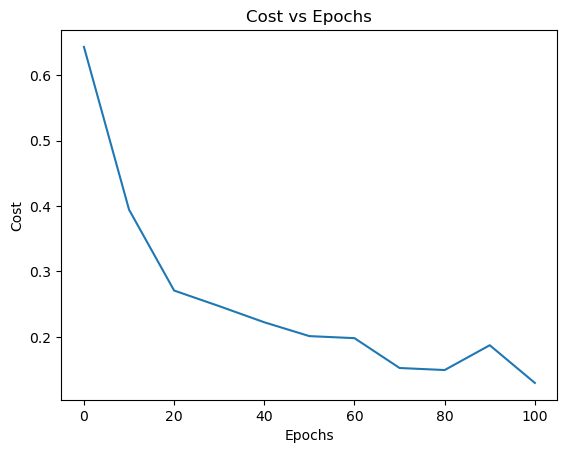

In [103]:
plt.plot(iterations, cost)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()


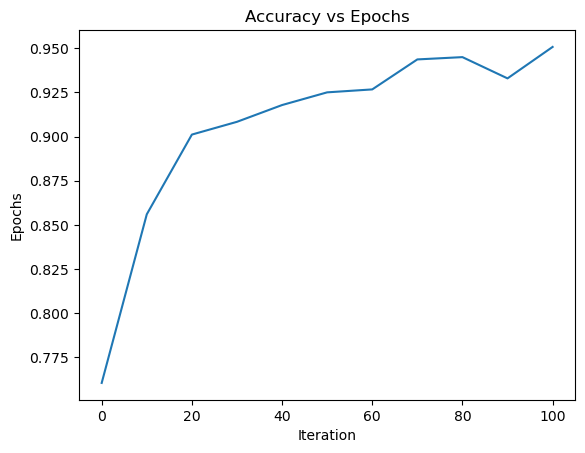

In [112]:

plt.plot(iterations, accuracies)
plt.xlabel("Iteration")
plt.ylabel("Epochs")
plt.title("Accuracy vs Epochs")
plt.show()

In [114]:
print("Accuracy of the model ", accuracies[-1])

Accuracy of the model  0.9508325138752313


In [116]:
# Testing

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):

    current_image = X_train[:, index, None]

    prediction = make_predictions(
        current_image, W1, b1, W2, b2, W3, b3
    )

    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [1]
Label:  1


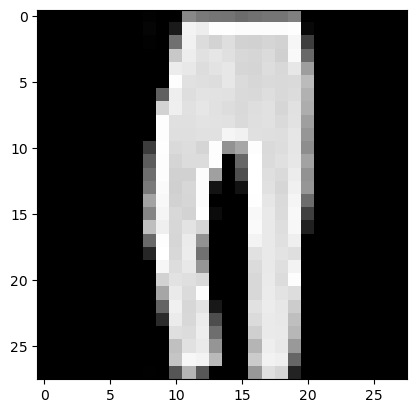

In [118]:
test_prediction(672, W1, b1, W2, b2, W3, b3)

Prediction:  [4]
Label:  4


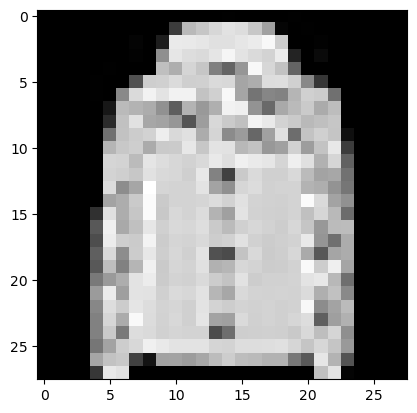

In [120]:
test_prediction(9019, W1, b1, W2, b2, W3, b3)

Prediction:  [7]
Label:  7


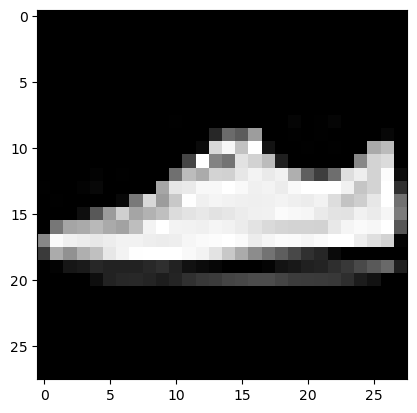

In [122]:
test_prediction(20152, W1, b1, W2, b2, W3, b3)

In [72]:
def confusion_matrix(predictions, Y, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(Y, predictions):
        cm[true][pred] += 1

    return cm


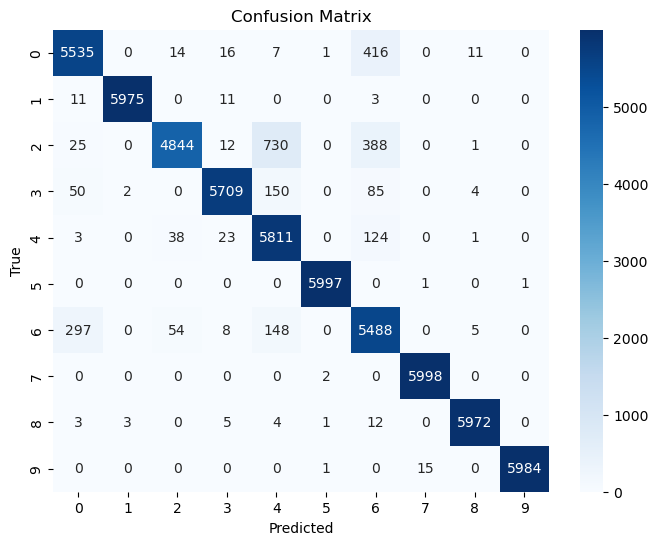

In [128]:
# Predictions on training/dev set
Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)

predictions = get_predictions(A3)

cm = confusion_matrix(predictions, Y_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [124]:
 #Tesing on the test set

test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

0.82085